In [ ]:
import pymc as pm
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import arviz as az

Output()

Output()

Output()

Output()

ERROR:pymc.stats.convergence:There were 46 divergences after tuning. Increase `target_accept` or reparameterize.


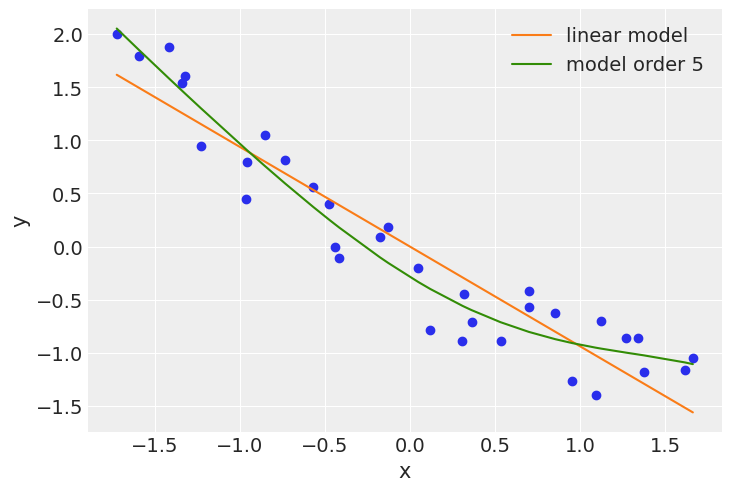

In [ ]:
# Ex 1, a)
# Stil grafic
az.style.use('arviz-darkgrid')

dummy_data = np.loadtxt('date.csv')
x_1 = dummy_data[:, 0]
y_1 = dummy_data[:, 1]

order = 5

x_1p = np.vstack([x_1**i for i in range(1, order + 1)])
x_1s = (x_1p - x_1p.mean(axis=1, keepdims=True)) / x_1p.std(axis=1, keepdims=True)
y_1s = (y_1 - y_1.mean()) / y_1.std()



plt.scatter(x_1s[0], y_1s)
plt.xlabel('x')
plt.ylabel('y')

with pm.Model() as model_l:
  α = pm.Normal('α', mu=0, sigma=1)
  β = pm.Normal('β', mu=0, sigma=10)
  ε = pm.HalfNormal('ε', 5)
  μ = α + β * x_1s[0]
  y_pred = pm.Normal('y_pred', mu=μ, sigma=ε, observed=y_1s)
  idata_l = pm.sample(2000, return_inferencedata=True)

with pm.Model() as model_p:
  α = pm.Normal('α', mu=0, sigma=1)
  β = pm.Normal('β', mu=0, sigma=10, shape=order)
  ε = pm.HalfNormal('ε', 5)
  μ = α + pm.math.dot(β, x_1s)
  y_pred = pm.Normal('y_pred', mu=μ, sigma=ε, observed=y_1s)
  idata_p = pm.sample(2000, return_inferencedata=True)

x_new = np.linspace(x_1s[0].min(), x_1s[0].max(), 100)

α_l_post = idata_l.posterior['α'].mean(("chain", "draw")).values
β_l_post = idata_l.posterior['β'].mean(("chain", "draw")).values
y_l_post = α_l_post + β_l_post * x_new

plt.plot(x_new, y_l_post, 'C1', label='linear model')

α_p_post = idata_p.posterior['α'].mean(("chain", "draw")).values
β_p_post = idata_p.posterior['β'].mean(("chain", "draw")).values
idx = np.argsort(x_1s[0])
y_p_post = α_p_post + np.dot(β_p_post, x_1s)

plt.plot(x_1s[0][idx], y_p_post[idx], 'C2', label=f'model order {order}')

plt.scatter(x_1s[0], y_1s, c='C0', marker='.')
plt.legend()


Output()

Output()

Output()

Output()

ERROR:pymc.stats.convergence:There were 173 divergences after tuning. Increase `target_accept` or reparameterize.


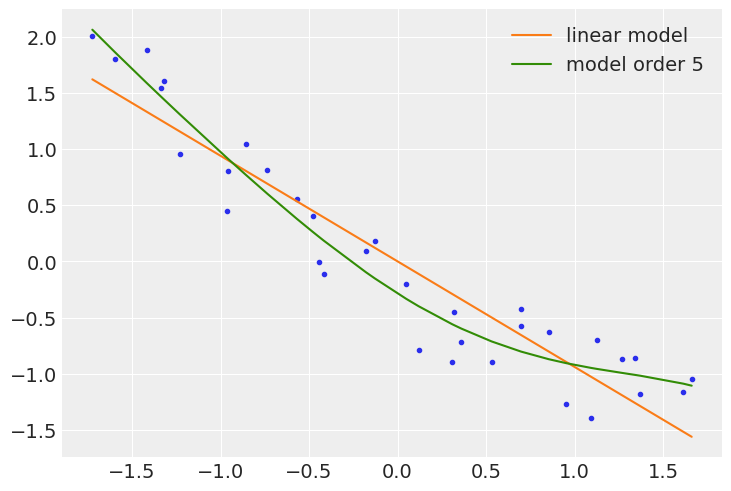

In [ ]:
# b)

with pm.Model() as model_l:
  α = pm.Normal('α', mu=0, sigma=1)
  β = pm.Normal('β', mu=0, sigma=100)
  ε = pm.HalfNormal('ε', 5)
  μ = α + β * x_1s[0]
  y_pred = pm.Normal('y_pred', mu=μ, sigma=ε, observed=y_1s)
  idata_l = pm.sample(2000, return_inferencedata=True)

with pm.Model() as model_p:
  α = pm.Normal('α', mu=0, sigma=1)
  β = pm.Normal('β', mu=0, sigma=100, shape=order)
  ε = pm.HalfNormal('ε', 5)
  μ = α + pm.math.dot(β, x_1s)
  y_pred = pm.Normal('y_pred', mu=μ, sigma=ε, observed=y_1s)
  idata_p = pm.sample(2000, return_inferencedata=True)

x_new = np.linspace(x_1s[0].min(), x_1s[0].max(), 100)

α_l_post = idata_l.posterior['α'].mean(("chain", "draw")).values
β_l_post = idata_l.posterior['β'].mean(("chain", "draw")).values
y_l_post = α_l_post + β_l_post * x_new

plt.plot(x_new, y_l_post, 'C1', label='linear model')

α_p_post = idata_p.posterior['α'].mean(("chain", "draw")).values
β_p_post = idata_p.posterior['β'].mean(("chain", "draw")).values
idx = np.argsort(x_1s[0])
y_p_post = α_p_post + np.dot(β_p_post, x_1s)

plt.plot(x_1s[0][idx], y_p_post[idx], 'C2', label=f'model order {order}')

plt.scatter(x_1s[0], y_1s, c='C0', marker='.')
plt.legend()


Output()

Output()

Output()

Output()

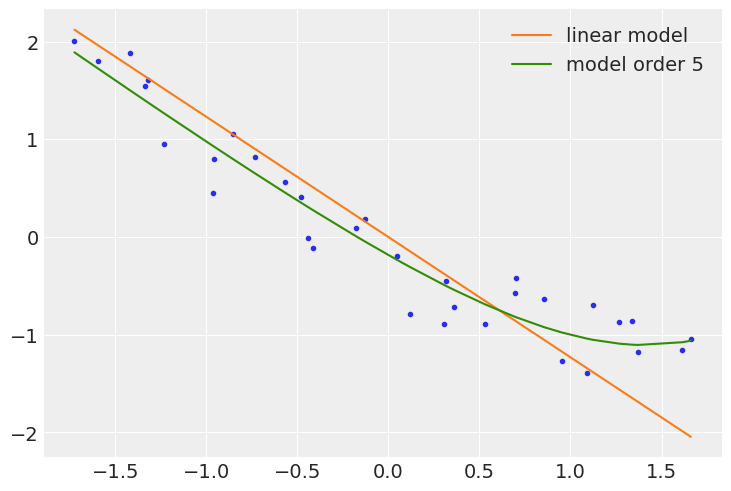

In [ ]:
# c)

# # Preprocesarea datelor
# x_1p = np.vstack([x_1**i for i in range(1, order + 1)])
# x_1s = (x_1p - x_1p.mean(axis=1, keepdims=True)) / x_1p.std(axis=1, keepdims=True)
# y_1s = (y_1 - y_1.mean()) / y_1.std()


# # Graficul datelor
# plt.scatter(x_1s[0], y_1s)
# plt.xlabel('x')
# plt.ylabel('y')

with pm.Model() as model_l:
  α = pm.Normal('α', mu=0, sigma=1)
  β = pm.Normal('β', mu=0, sigma=np.array([10, 0.1, 0.1, 0.1, 0.1]))
  ε = pm.HalfNormal('ε', 5)
  μ = α + pm.math.dot(x_1s.T, β)
  y_pred = pm.Normal('y_pred', mu=μ, sigma=ε, observed=y_1s)
  idata_l = pm.sample(2000, return_inferencedata=True)

with pm.Model() as model_p:
  α = pm.Normal('α', mu=0, sigma=1)
  β = pm.Normal('β', mu=0, sigma=np.array([10, 0.1, 0.1, 0.1, 0.1]), shape=order)
  ε = pm.HalfNormal('ε', 5)
  μ = α + pm.math.dot(β, x_1s)
  y_pred = pm.Normal('y_pred', mu=μ, sigma=ε, observed=y_1s)
  idata_p = pm.sample(2000, return_inferencedata=True)

x_new = np.linspace(x_1s[0].min(), x_1s[0].max(), 100)

α_l_post = idata_l.posterior['α'].mean(("chain", "draw")).values
β_l_post = idata_l.posterior['β'].mean(("chain", "draw")).values

x_new_p = np.vstack([x_new**i for i in range(1, order + 1)])
# y_l_post = α_l_post + np.dot(β_l_post, x_new_p)
y_l_post = α_l_post + β_l_post[0] * x_new

plt.plot(x_new, y_l_post, 'C1', label='linear model')

α_p_post = idata_p.posterior['α'].mean(("chain", "draw")).values
β_p_post = idata_p.posterior['β'].mean(("chain", "draw")).values
idx = np.argsort(x_1s[0])
y_p_post = α_p_post + np.dot(β_p_post, x_1s)

plt.plot(x_1s[0][idx], y_p_post[idx], 'C2', label=f'model order {order}')

plt.scatter(x_1s[0], y_1s, c='C0', marker='.')
plt.legend()


Output()

Output()

Output()

Output()

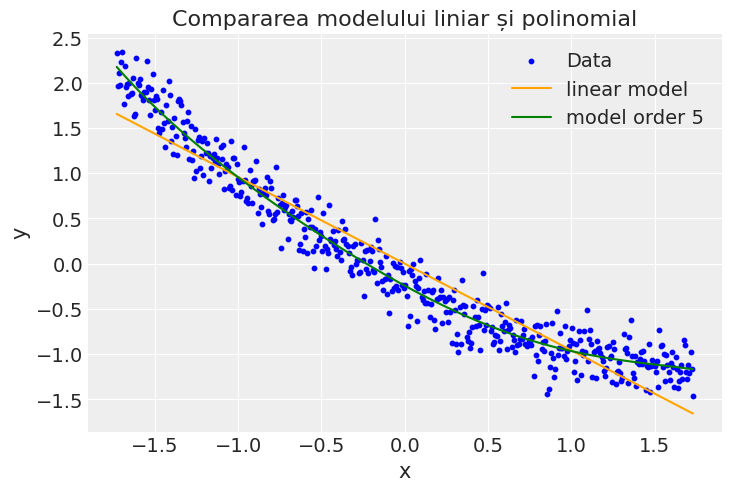

In [ ]:
# Ex 1, 2.
from sklearn.preprocessing import PolynomialFeatures

az.style.use('arviz-darkgrid')

dummy_data = np.loadtxt('date.csv')
x_1 = dummy_data[:, 0]
y_1 = dummy_data[:, 1]

x_1_new = np.linspace(x_1.min(), x_1.max(), 500)
# regresie polinomiala de ordin 3 pentru interpolare
poly_interp = PolynomialFeatures(degree=3)
X_interp = poly_interp.fit_transform(x_1.reshape(-1, 1))
coeffs = np.polyfit(x_1, y_1, deg=3)
y_1_interp = np.polyval(coeffs, x_1_new)

noise = np.random.normal(0, 0.90, size=500)
y_1_new = y_1_interp + noise

x_1s = (x_1_new - np.mean(x_1_new)) / np.std(x_1_new)
y_1s = (y_1_new - np.mean(y_1_new)) / np.std(y_1_new)

# x_1s = (x_1 - np.mean(x_1)) / np.std(x_1)
# y_1s = (y_1 - np.mean(y_1)) / np.std(y_1)

order = 5

poly = PolynomialFeatures(degree=order, include_bias=False)
X_poly = poly.fit_transform(x_1s.reshape(-1, 1))

plt.scatter(x_1s, y_1s, label='Data', color='blue', s=10)

with pm.Model() as model_l:
    α = pm.Normal('α', mu=0, sigma=1)
    β = pm.Normal('β', mu=0, sigma=10)
    ε = pm.HalfNormal('ε', 5)
    μ = α + β * x_1s
    y_pred = pm.Normal('y_pred', mu=μ, sigma=ε, observed=y_1s)
    idata_l = pm.sample(2000, return_inferencedata=True)

with pm.Model() as model_p:
    α = pm.Normal('α', mu=0, sigma=1)
    β = pm.Normal('β', mu=0, sigma=10, shape=X_poly.shape[1])
    ε = pm.HalfNormal('ε', 5)
    μ = α + pm.math.dot(X_poly, β)
    y_pred = pm.Normal('y_pred', mu=μ, sigma=ε, observed=y_1s)
    idata_p = pm.sample(2000, return_inferencedata=True)

x_new = np.linspace(x_1s.min(), x_1s.max(), 100)
X_poly_new = poly.transform(x_new.reshape(-1, 1))

α_l_post = idata_l.posterior['α'].mean(("chain", "draw")).values
β_l_post = idata_l.posterior['β'].mean(("chain", "draw")).values
y_l_post = α_l_post + β_l_post * x_new

plt.plot(x_new, y_l_post, color='orange', label='linear model')

α_p_post = idata_p.posterior['α'].mean(("chain", "draw")).values
β_p_post = idata_p.posterior['β'].mean(("chain", "draw")).values
y_p_post = α_p_post + np.dot(X_poly_new, β_p_post)

plt.plot(x_new, y_p_post, color='green', label=f'model order {order}')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Compararea modelului liniar și polinomial')
plt.show()


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

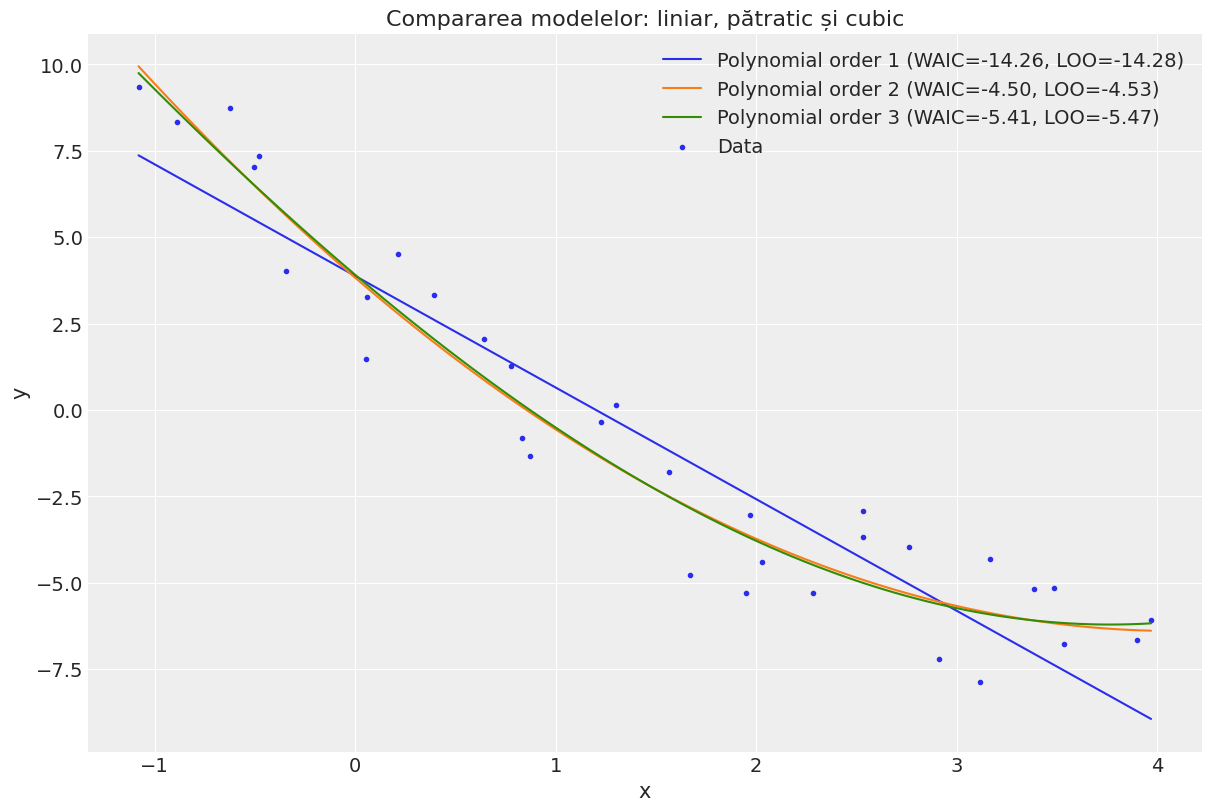

Order 1:
  WAIC: -14.26
  LOO: -14.28

Order 2:
  WAIC: -4.50
  LOO: -4.53

Order 3:
  WAIC: -5.41
  LOO: -5.47



In [ ]:
# Ex 1, 3.
# Stil grafic
az.style.use('arviz-darkgrid')

dummy_data = np.loadtxt('date.csv')
x_1 = dummy_data[:, 0]
y_1 = dummy_data[:, 1]

def preprocess_data(x, y, order):
    x_p = np.vstack([x**i for i in range(1, order + 1)])
    x_s = (x_p - x_p.mean(axis=1, keepdims=True)) / x_p.std(axis=1, keepdims=True)
    y_s = (y - y.mean()) / y.std()
    return x_s, y_s

orders = [1, 2, 3]
results = {}

for order in orders:
    x_1s, y_1s = preprocess_data(x_1, y_1, order)

    with pm.Model() as model:
        α = pm.Normal('α', mu=0, sigma=1)
        β = pm.Normal('β', mu=0, sigma=10, shape=order)
        ε = pm.HalfNormal('ε', 5)
        μ = α + pm.math.dot(β, x_1s)
        y_pred = pm.Normal('y_pred', mu=μ, sigma=ε, observed=y_1s)
        idata = pm.sample(2000, return_inferencedata=True, log_likelihood=True)
        pm.compute_log_likelihood(idata,model=model)
        waic = az.waic(idata)
        loo = az.loo(idata)

        # waic_l = az.waic(idata_l, scale="deviance")

        results[order] = {
            "idata": idata,
            "waic": waic,
            "loo": loo,
            "α_post": idata.posterior['α'].mean(("chain", "draw")).values,
            "β_post": idata.posterior['β'].mean(("chain", "draw")).values
        }

plt.figure(figsize=(12, 8))
x_new = np.linspace(x_1.min(), x_1.max(), 100)

for order, res in results.items():
    α_post = res["α_post"]
    β_post = res["β_post"]
    x_1s, _ = preprocess_data(x_new, y_1, order)
    y_pred_post = α_post + np.dot(β_post, x_1s)

    # label = f'Polynomial order {order} (WAIC={res["waic"].waic:.2f}, LOO={res["loo"].loo:.2f})'
    label = f'Polynomial order {order} (WAIC={res["waic"].elpd_waic:.2f}, LOO={res["loo"].elpd_loo:.2f})'
    plt.plot(x_new, y_pred_post, label=label)

plt.scatter(x_1, y_1, c='C0', marker='.', label='Data')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Compararea modelelor: liniar, pătratic și cubic')
plt.show()

for order, res in results.items():
    print(f"Order {order}:")
    # print(f"  WAIC: {res['waic'].waic:.2f}")
    # print(f"  LOO: {res['loo'].loo:.2f}")
    print(f"  WAIC: {res['waic'].elpd_waic:.2f}")
    print(f"  LOO: {res['loo'].elpd_loo:.2f}")

    print()

Output()

Output()

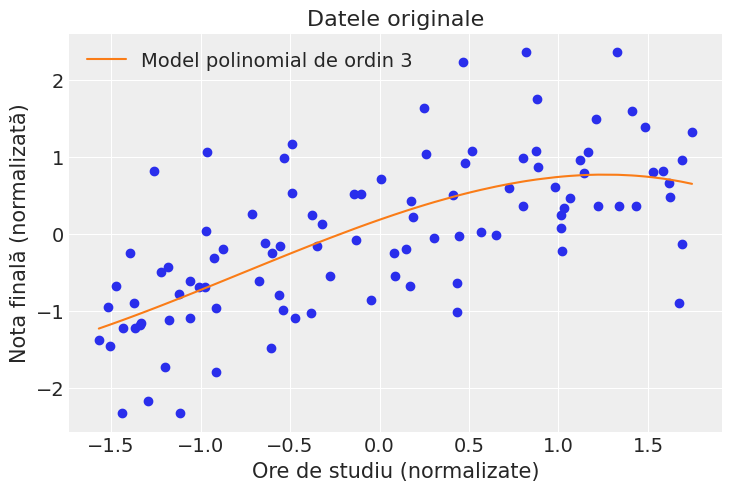

In [ ]:
import pandas as pd

az.style.use('arviz-darkgrid')

data = pd.read_csv('date_studiu_nota.csv')
x_1 = data['Ore_Studiu'].values
y_1 = data['Nota_Finala'].values

order = 3

# preprocesarea datelor
x_1p = np.vstack([x_1**i for i in range(1, order + 1)])
x_1s = (x_1p - x_1p.mean(axis=1, keepdims=True)) / x_1p.std(axis=1, keepdims=True)
y_1s = (y_1 - y_1.mean()) / y_1.std()

plt.scatter(x_1s[0], y_1s)
plt.xlabel('Ore de studiu (normalizate)')
plt.ylabel('Nota finală (normalizată)')
plt.title('Datele originale')

with pm.Model() as model_p:
    α = pm.Normal('α', mu=0, sigma=1)
    β = pm.Normal('β', mu=0, sigma=10, shape=order)
    ε = pm.HalfNormal('ε', 5)
    μ = α + pm.math.dot(β, x_1s)
    y_pred = pm.Normal('y_pred', mu=μ, sigma=ε, observed=y_1s)
    idata_p = pm.sample(2000, return_inferencedata=True)

x_new = np.linspace(x_1s[0].min(), x_1s[0].max(), 100)

# predictia modelului polinomial - rep grafica a mediilor
α_p_post = idata_p.posterior['α'].mean(("chain", "draw")).values
β_p_post = idata_p.posterior['β'].mean(("chain", "draw")).values
idx = np.argsort(x_1s[0])
y_p_post = α_p_post + np.dot(β_p_post, x_1s)

plt.plot(x_1s[0][idx], y_p_post[idx], 'C1', label=f'Model polinomial de ordin {order}')

plt.scatter(x_1s[0], y_1s, c='C0', marker='.')
plt.legend()

plt.show()


Output()

Output()

Output()

/usr/local/lib/python3.10/dist-packages/arviz/stats/stats.py:1653: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


Output()

Output()

Output()

/usr/local/lib/python3.10/dist-packages/arviz/stats/stats.py:1653: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


Output()

Output()

Output()

/usr/local/lib/python3.10/dist-packages/arviz/stats/stats.py:1653: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


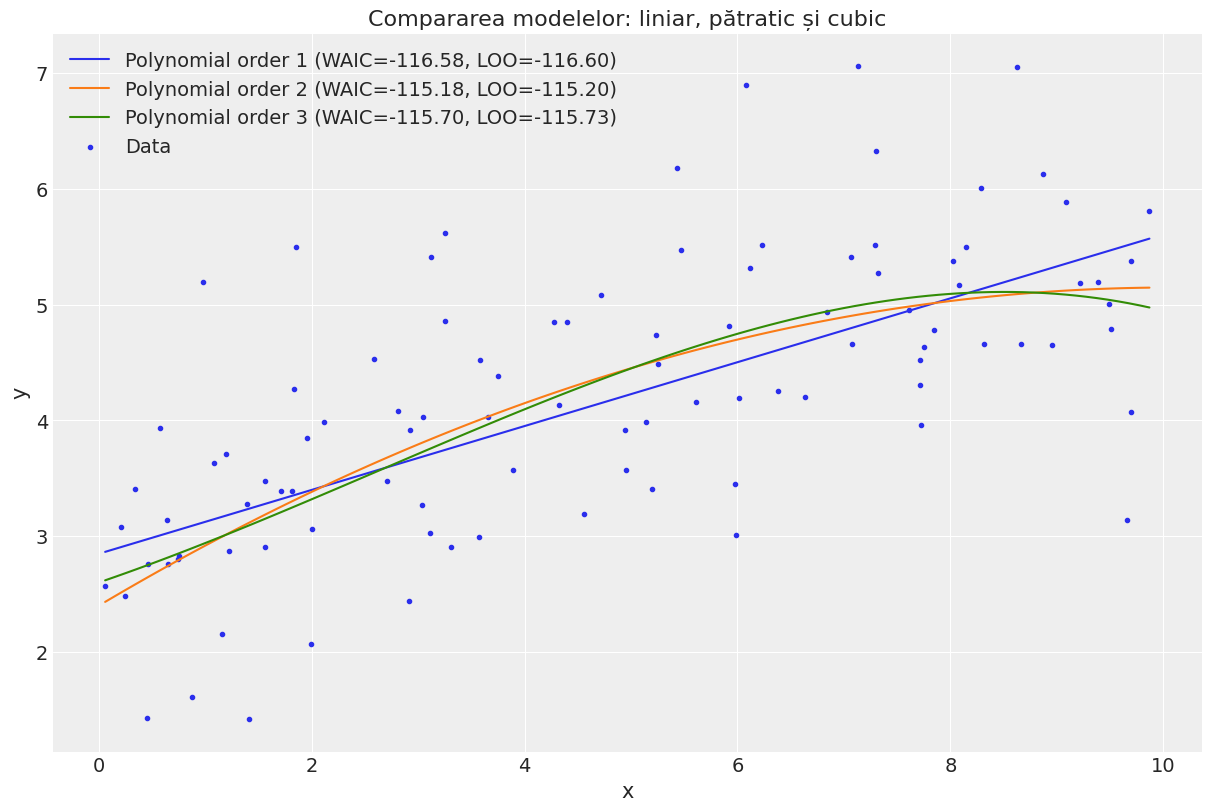

Order 1:
  WAIC: -116.58
  LOO: -116.60

Order 2:
  WAIC: -115.18
  LOO: -115.20

Order 3:
  WAIC: -115.70
  LOO: -115.73



In [ ]:
az.style.use('arviz-darkgrid')

data = pd.read_csv('date_studiu_nota.csv')
x_1 = data['Ore_Studiu'].values
y_1 = data['Nota_Finala'].values

def preprocess_data(x, y, order):
    x_p = np.vstack([x**i for i in range(1, order + 1)])
    x_s = (x_p - x_p.mean(axis=1, keepdims=True)) / x_p.std(axis=1, keepdims=True)
    y_s = (y - y.mean()) / y.std()
    return x_s, y_s

orders = [1, 2, 3]
results = {}

for order in orders:
    x_1s, y_1s = preprocess_data(x_1, y_1, order)

    with pm.Model() as model:
        α = pm.Normal('α', mu=0, sigma=1)
        β = pm.Normal('β', mu=0, sigma=10, shape=order)
        ε = pm.HalfNormal('ε', 5)
        μ = α + pm.math.dot(β, x_1s)
        y_pred = pm.Normal('y_pred', mu=μ, sigma=ε, observed=y_1s)
        idata = pm.sample(2000, return_inferencedata=True, log_likelihood=True)
        pm.compute_log_likelihood(idata,model=model)
        waic = az.waic(idata)
        loo = az.loo(idata)

        # waic_l = az.waic(idata_l, scale="deviance")

        results[order] = {
            "idata": idata,
            "waic": waic,
            "loo": loo,
            "α_post": idata.posterior['α'].mean(("chain", "draw")).values,
            "β_post": idata.posterior['β'].mean(("chain", "draw")).values
        }

# reprezentare grafica a rezultatelor
plt.figure(figsize=(12, 8))
x_new = np.linspace(x_1.min(), x_1.max(), 100)

for order, res in results.items():
    α_post = res["α_post"]
    β_post = res["β_post"]

    x_1s, _ = preprocess_data(x_new, y_1, order)

    y_pred_post_scaled = α_post + np.dot(β_post, x_1s)

    y_pred_post = y_pred_post_scaled * y_1.std() + y_1.mean()

    label = f'Polynomial order {order} (WAIC={res["waic"].elpd_waic:.2f}, LOO={res["loo"].elpd_loo:.2f})'
    plt.plot(x_new, y_pred_post, label=label)

# adaug si datelor originale
plt.scatter(x_1, y_1, c='C0', marker='.', label='Data')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Compararea modelelor: liniar, pătratic și cubic')
plt.show()

for order, res in results.items():
    print(f"Order {order}:")
    print(f"  WAIC: {res['waic'].elpd_waic:.2f}")
    print(f"  LOO: {res['loo'].elpd_loo:.2f}")

    print()

